In [1]:
print("test")

test


In [2]:
# Import Libraries

import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('G:\DataScienceProjects\Machine-Learning-Projects\Credit-Card-Fraud-Detection-MachineLearning-Complete-Project\creditcard.csv')

In [4]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

Data Cleaning

In [5]:
# Identify null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Duplicate values
df.duplicated().sum()

np.int64(1081)

In [7]:
duplicates = df[df.duplicated()]
print("Number of duplicates:", len(duplicates))
duplicates.head()


Number of duplicates: 1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [8]:
# Delete duplicate records
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (283726, 31)


create images folder to save the plots

In [9]:
import os


if not os.path.exists("images"):
    os.makedirs("images", exist_ok=True)

Checking skewness

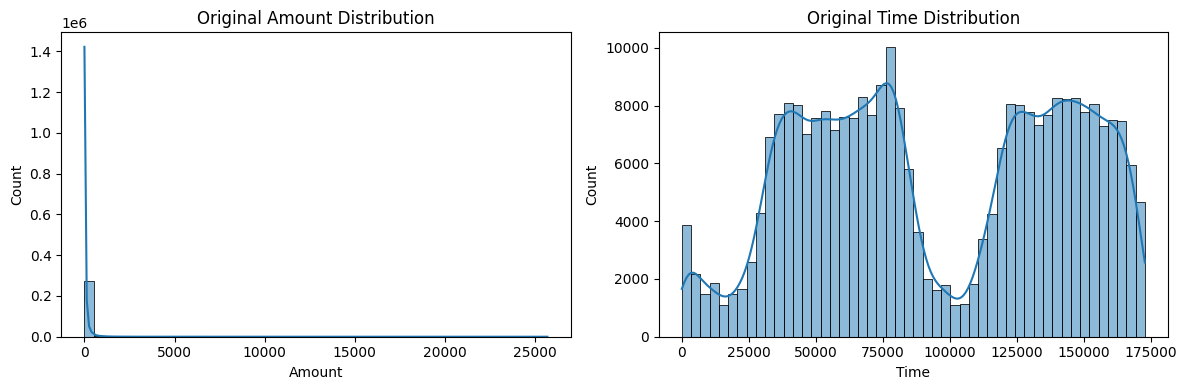

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["Amount", "Time"]

fig, axes = plt.subplots(1, 2, figsize=(12,4))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Original {col} Distribution")
plt.tight_layout()

# Save figure
plt.savefig("images/skew_before.png", dpi=300)
plt.show()  # Still displays the plot in notebook

Apply Power Transformer to reduce skewness

In [11]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df.loc[:, numeric_cols] = pt.fit_transform(df[numeric_cols])


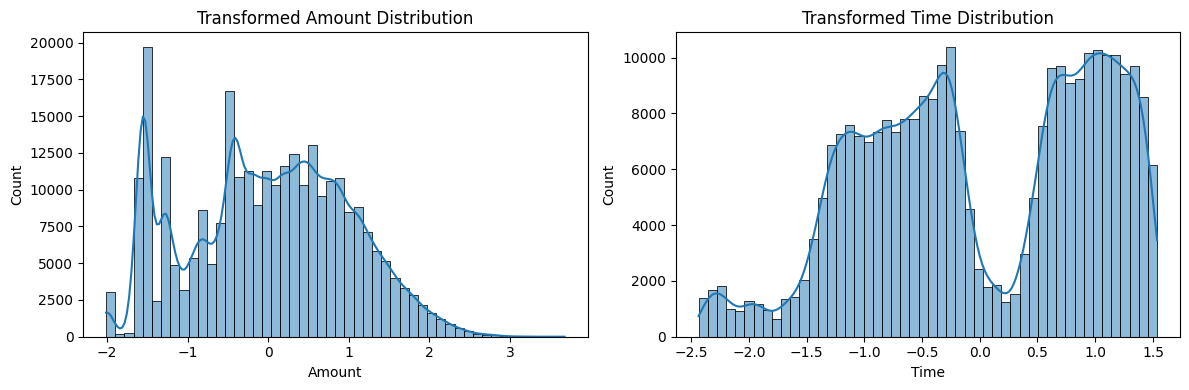

In [12]:
# Plot transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {col} Distribution")
plt.tight_layout()
plt.savefig("images/skew_after.png", dpi=300)
plt.show()

Outlier Detection using BoxPlot

<Axes: xlabel='Amount'>

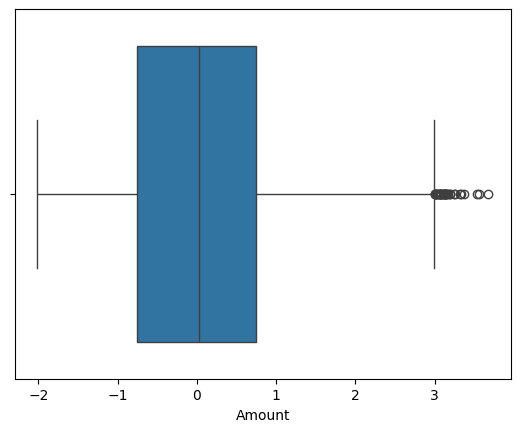

In [13]:
import seaborn as sns
sns.boxplot(x=df["Amount"])


In [14]:
outlier_rows = pd.DataFrame()
cols = df.columns.drop("Class")
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    outlier_rows = pd.concat([outlier_rows, outliers])

# Drop duplicate rows (a row can be an outlier in multiple columns)
outlier_rows = outlier_rows.drop_duplicates()
print(f"Total unique outlier rows across all columns: {len(outlier_rows)}")
display(outlier_rows.head(10))


Total unique outlier rows across all columns: 128084


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,-2.432445,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,0.461858,0
85,-2.427252,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,1.277612,0
140,-2.423860,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,2.086712,0
146,-2.423359,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,-0.491299,0
164,-2.422276,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,2.796394,0
174,-2.421410,-4.816022,-3.345061,0.566006,3.960568,-2.495400,3.691365,1.603360,-0.071801,1.092418,...,-0.797155,0.260093,-2.712276,-1.020436,0.070990,0.619086,1.720707,-1.648553,2.096708,0
210,-2.418809,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,0.649668,0
290,-2.412851,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,-0.490036,0
401,-2.406410,-5.166299,-5.449369,2.988498,2.658991,1.948152,-0.854470,-0.326394,-1.017364,1.983901,...,-1.297221,1.172278,3.150413,0.574081,1.018394,0.987099,0.658283,-1.609716,0.801747,0
811,-2.383614,-4.701074,4.208707,-2.403940,0.036473,-2.903481,-1.535532,-2.225579,3.444228,-0.310356,...,-0.148895,-0.996819,0.439302,0.289497,0.356355,0.122141,-0.008911,-0.006072,-0.278638,0


You now have 128,084 unique rows flagged as outliers in at least one column. That’s almost half of your dataset (~283k rows of class 0 + 473 of class 1), which is expected for highly skewed features like Amount and Time.

Do NOT remove all these rows blindly

Many of them are likely normal transactions with extreme values, not fraud.

If you remove them, you might lose legitimate data, hurting your model.

Use outlier info as a feature instead

Add a column like is_outlier or outlier_count to your DataFrame:

In [15]:
df = df.copy()  # now df is independent, modifying it is safe
df['is_outlier'] = 0
df.loc[outlier_rows.index, 'is_outlier'] = 1


Visualise the plots:
---
1️⃣ Boxplots

Pros:

Excellent for univariate outlier detection (one variable at a time).

Shows median, quartiles, and extreme values clearly.

Easy to visualize outliers for all numeric columns individually.

Cons:

Only shows one feature at a time.

Cannot show relationships between features.

In high-dimensional data (like V1–V28), you would need 28+ separate boxplots, which is tedious.



2️⃣ Scatterplots

Pros:

Shows the relationship between two variables (e.g., V1 vs V2).

Can highlight multivariate outliers, which are points that may not look extreme in any single column but are unusual in combination.

Especially useful after PCA or feature reduction, where dimensions capture combined patterns.

Cons:

Only 2 variables per plot (or 3 with 3D).

Not as straightforward for single-column outliers.

Credit Card Fraud Context

Boxplots → Great for quickly spotting unusual amounts or time values.

Scatterplots (PCA features) → Great for spotting fraudulent transactions that are extreme in multivariate space, not just in one column.

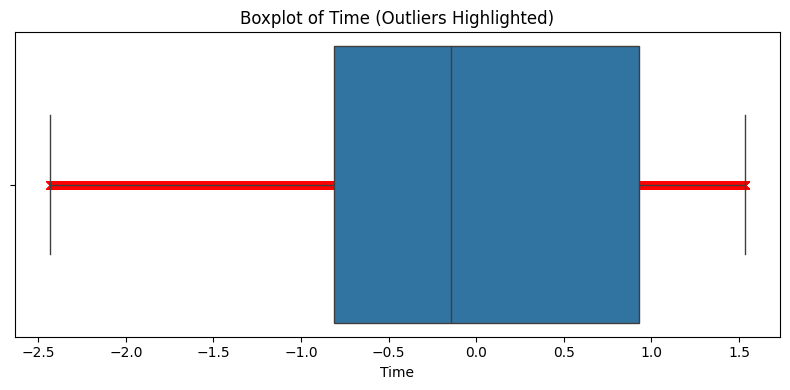

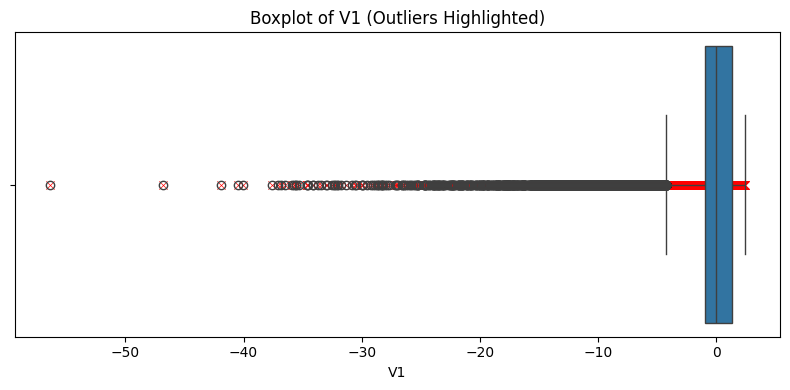

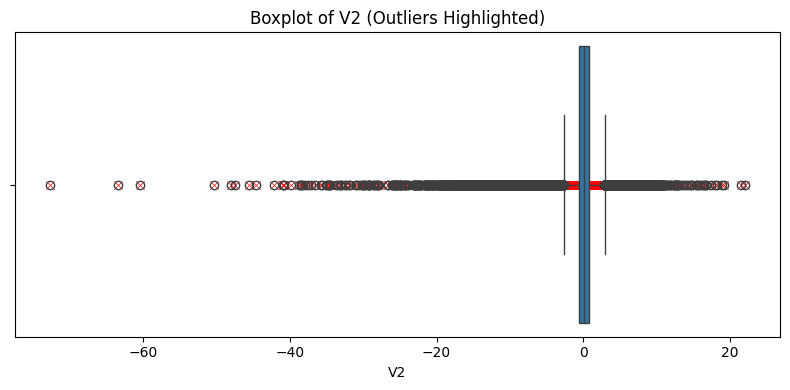

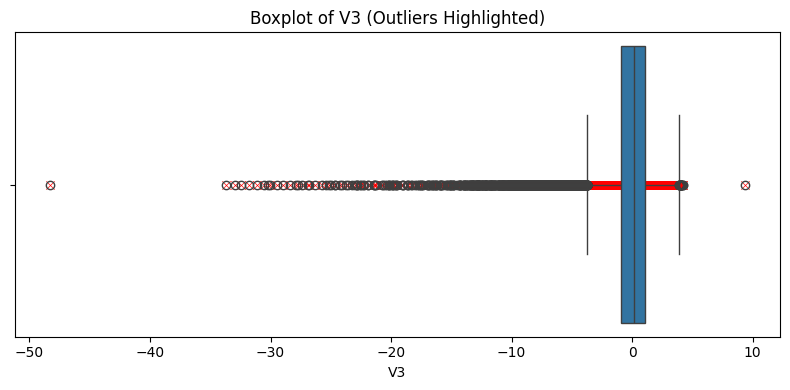

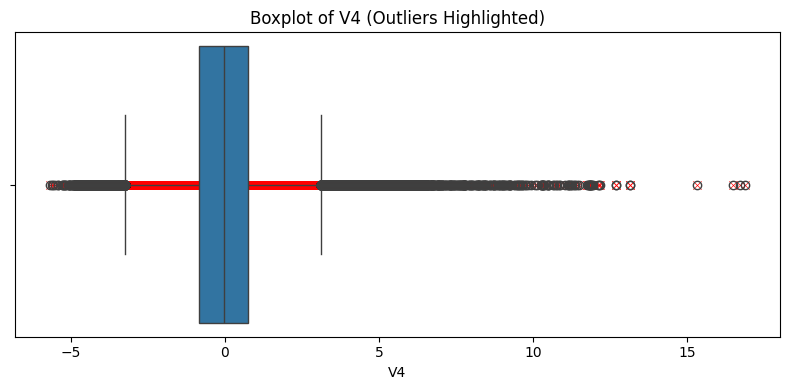

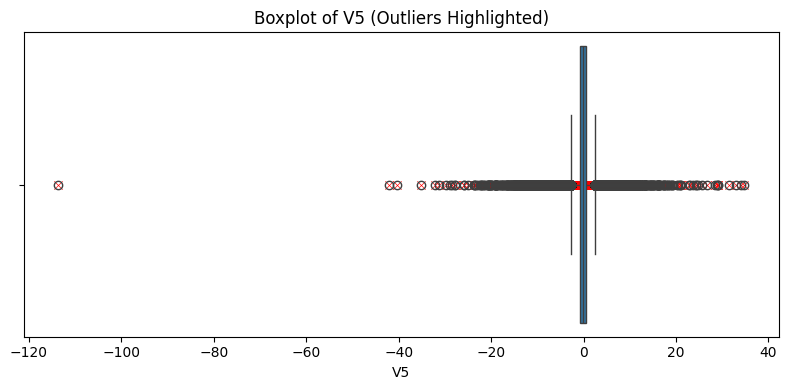

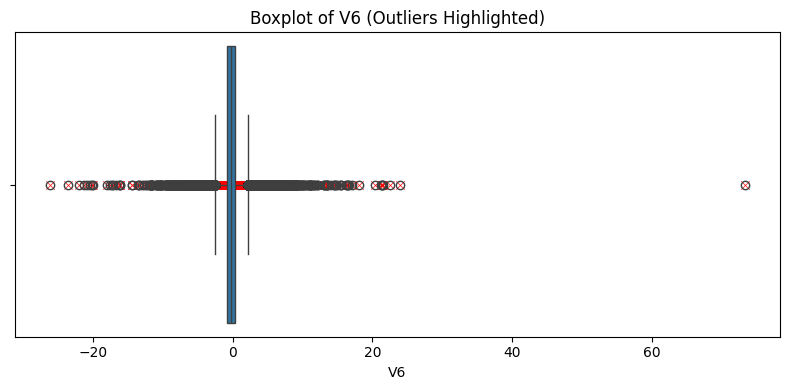

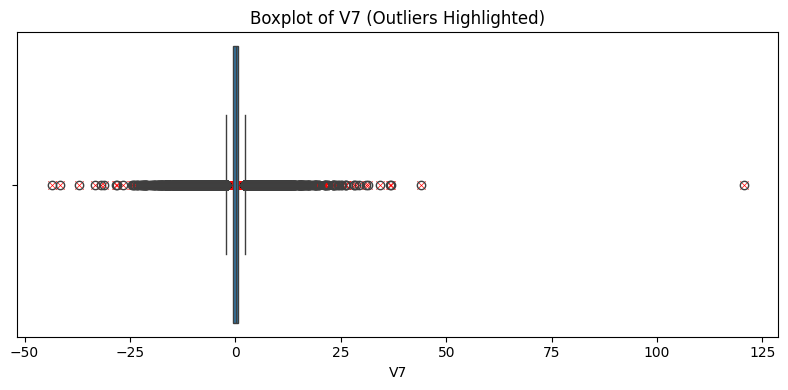

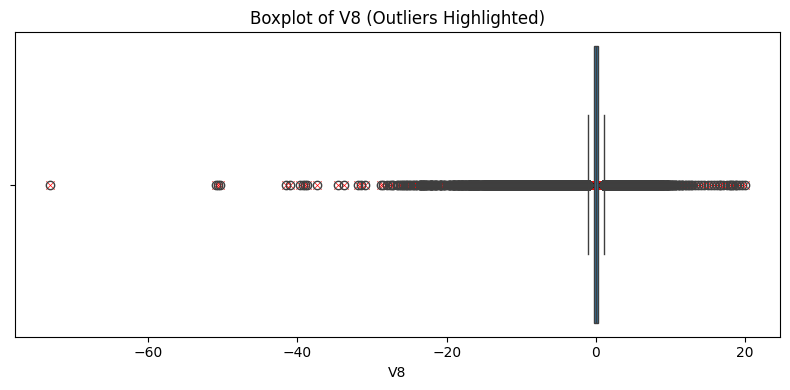

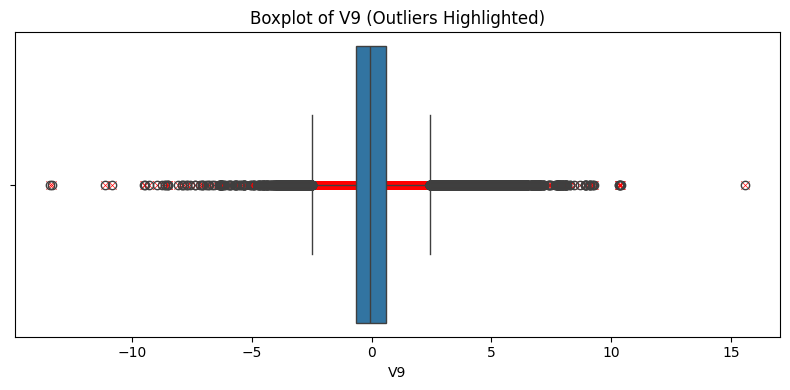

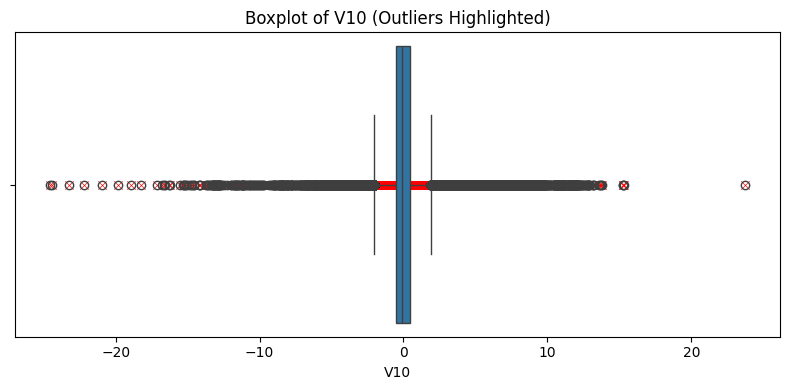

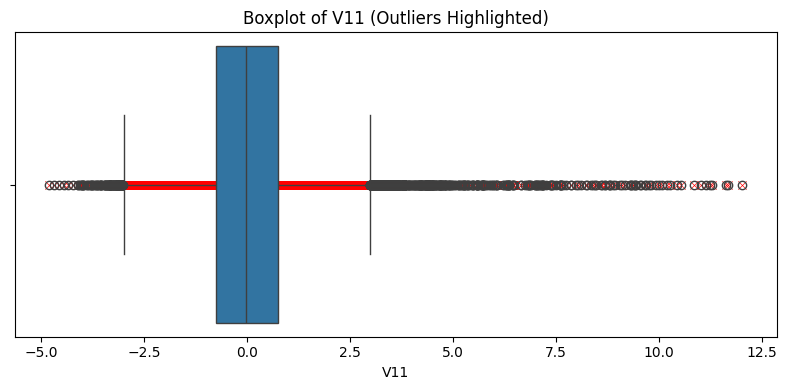

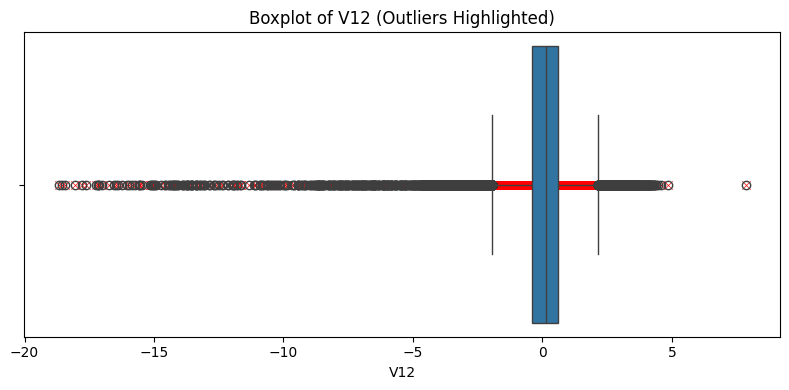

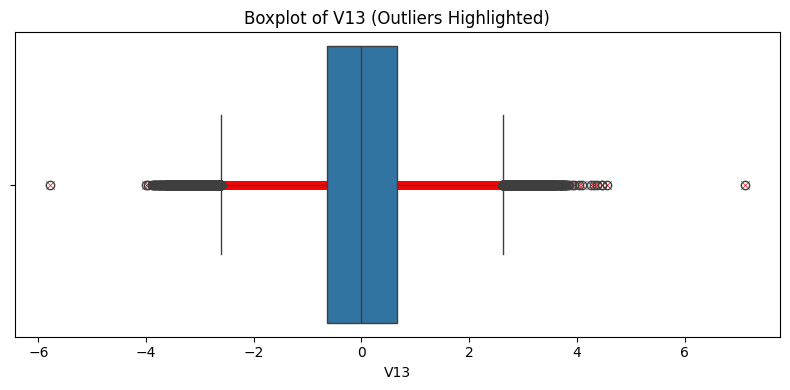

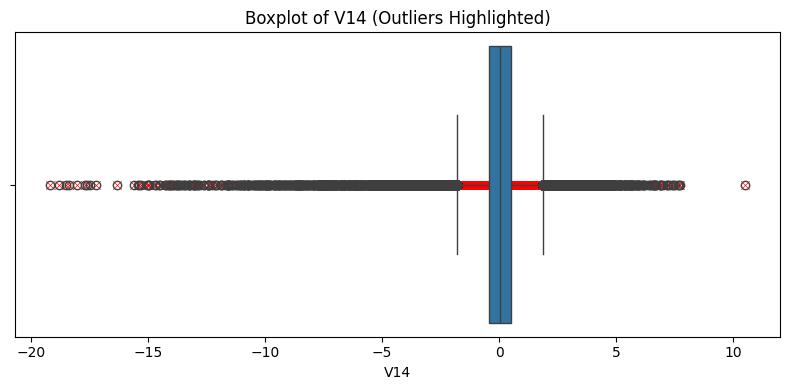

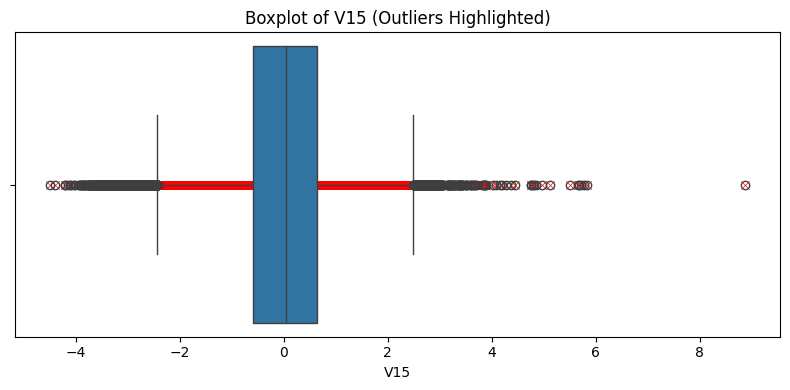

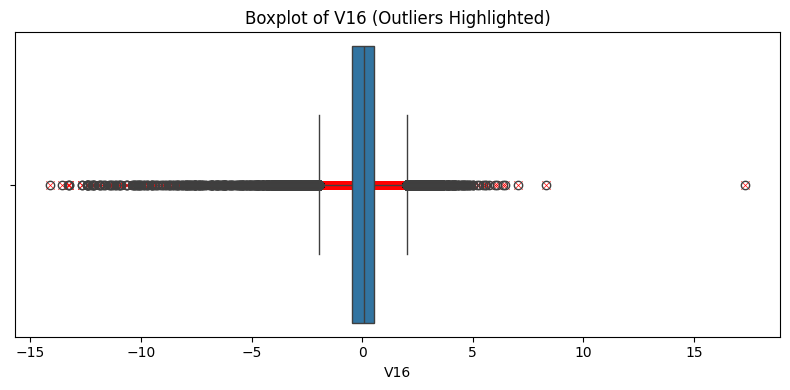

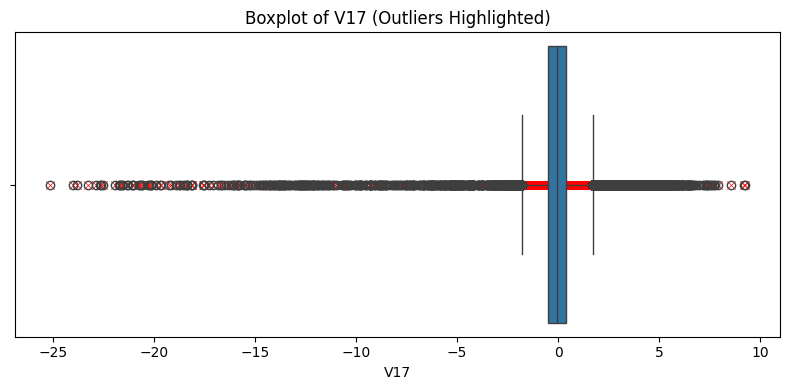

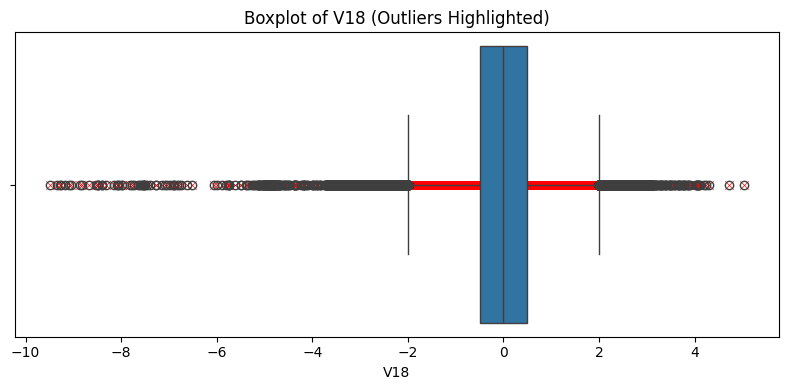

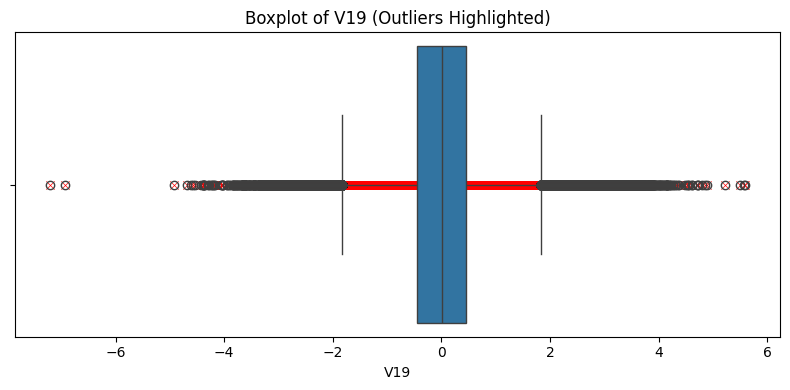

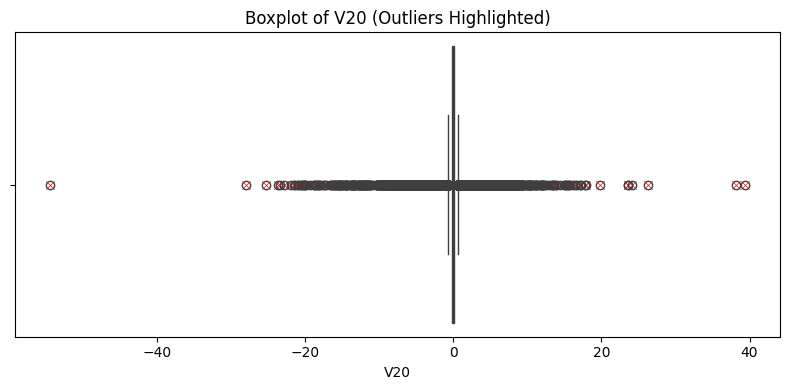

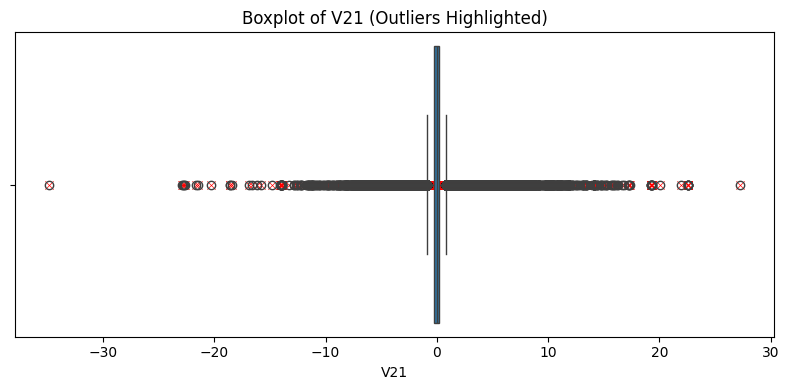

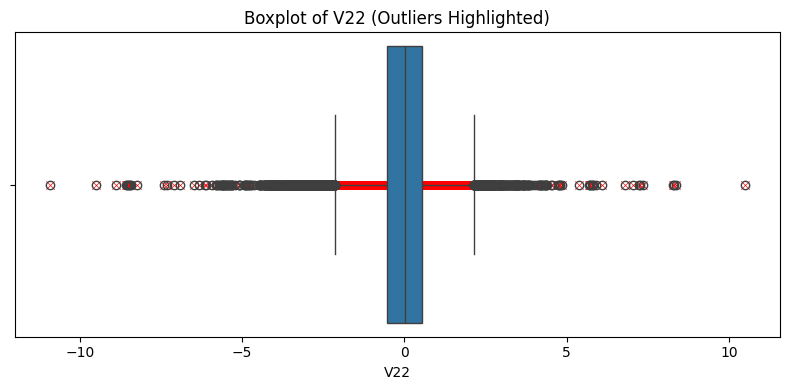

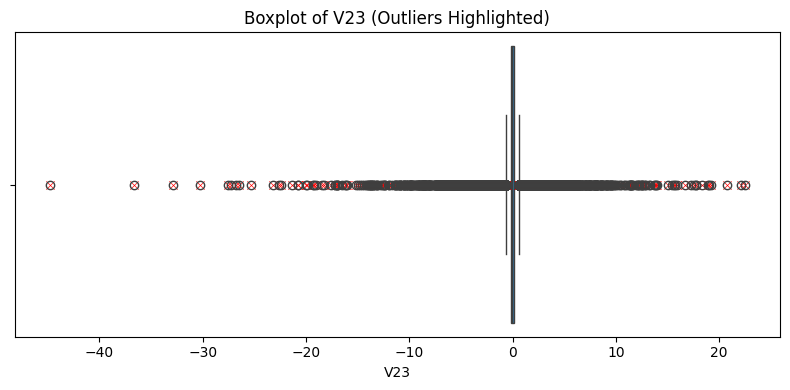

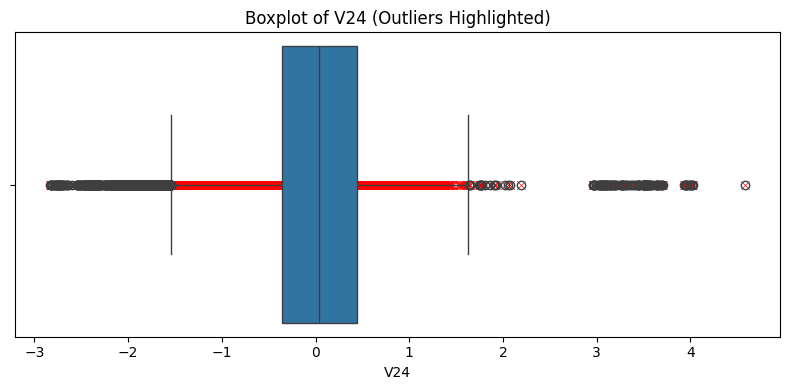

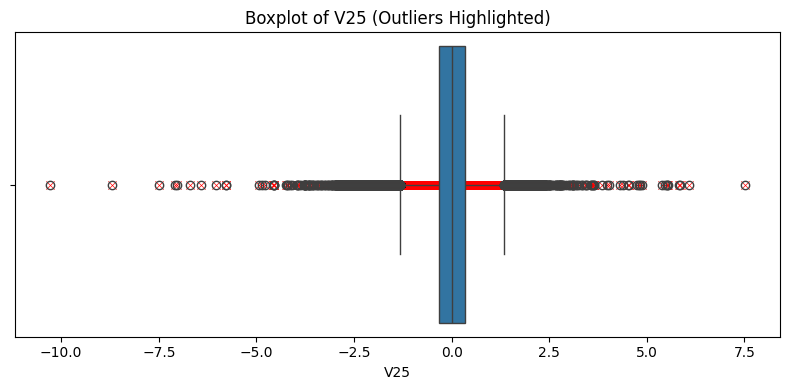

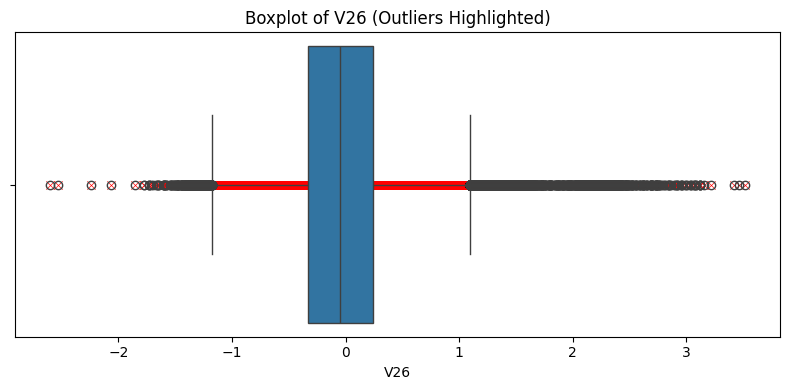

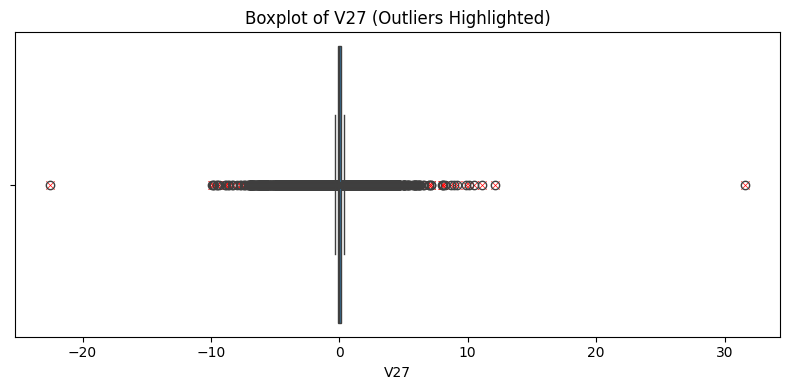

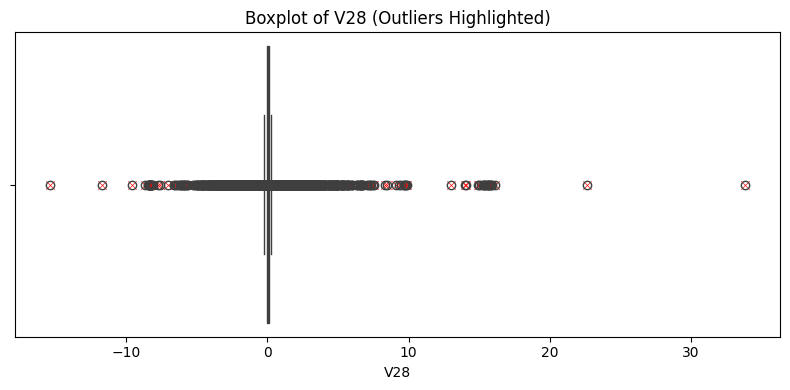

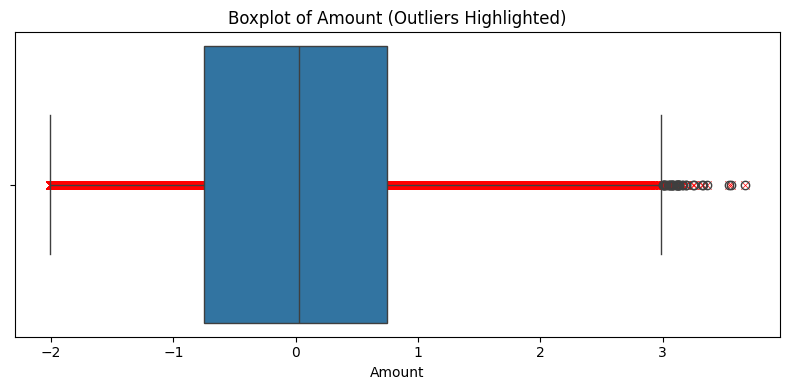

All boxplots saved to 'images/' folder!


In [16]:
for col in cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outliers Highlighted)")
    
    # Highlight outliers in red on top of boxplot
    outlier_values = df.loc[df['is_outlier']==1, col]
    sns.scatterplot(x=outlier_values, y=[0]*len(outlier_values), color='red', label='Outliers', marker='x',legend=False)
    
    plt.xlabel(col)
    plt.tight_layout()
    
    # Save to images folder
    plt.savefig(f"images/{col}_outlier_boxplot.png")
    plt.show()
    plt.close()  # close the figure to avoid overlapping plots

print("All boxplots saved to 'images/' folder!")

In [17]:
import os

images = os.listdir("images")
images.sort()
print(f"Total images saved: {len(images)}")
print(images[:30])  # show first 30 plots


Total images saved: 33
['Amount_outlier_boxplot.png', 'Time_outlier_boxplot.png', 'V10_outlier_boxplot.png', 'V11_outlier_boxplot.png', 'V12_outlier_boxplot.png', 'V13_outlier_boxplot.png', 'V14_outlier_boxplot.png', 'V15_outlier_boxplot.png', 'V16_outlier_boxplot.png', 'V17_outlier_boxplot.png', 'V18_outlier_boxplot.png', 'V19_outlier_boxplot.png', 'V1_outlier_boxplot.png', 'V20_outlier_boxplot.png', 'V21_outlier_boxplot.png', 'V22_outlier_boxplot.png', 'V23_outlier_boxplot.png', 'V24_outlier_boxplot.png', 'V25_outlier_boxplot.png', 'V26_outlier_boxplot.png', 'V27_outlier_boxplot.png', 'V28_outlier_boxplot.png', 'V2_outlier_boxplot.png', 'V3_outlier_boxplot.png', 'V4_outlier_boxplot.png', 'V5_outlier_boxplot.png', 'V6_outlier_boxplot.png', 'V7_outlier_boxplot.png', 'V8_outlier_boxplot.png', 'V9_outlier_boxplot.png']


Feature Engineering

No Categorical columns present in this dataset
No need to apply One Hot Encoding and Label Encoding....so new features will not be produced
No need of Feature Engineering step 

Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

Train Test and Split

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop("Class", axis=1)
y = df["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [20]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Imbalance Dataset according to above Class

Handle Imbalance Class

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())

Before SMOTE:
 Class
0    226597
1       383
Name: count, dtype: int64
After SMOTE:
 Class
0    226597
1    226597
Name: count, dtype: int64


In [22]:
import dagshub

dagshub.init(
    repo_owner='chandrasekharcse522',
    repo_name='Credit-Card-Fraud-Detection-MachineLearning-Complete-Project',
    mlflow=True
)


Accessing as chandrasekharcse522

Initialized MLflow to track repo "chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project"

Repository chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project initialized!

In [23]:
import mlflow

print("MLflow Tracking URI:", mlflow.get_tracking_uri())


MLflow Tracking URI: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow


In [24]:
mlflow.set_experiment("CreditCardFraud_ML_Algorithms")


<Experiment: artifact_location='mlflow-artifacts:/e705cffa81b34b2c899b9ddef6cd2cc5', creation_time=1762186589626, experiment_id='0', last_update_time=1762186589626, lifecycle_stage='active', name='CreditCardFraud_ML_Algorithms', tags={}>

In [25]:
import dagshub
dagshub.init(repo_owner='chandrasekharcse522',
             repo_name='Credit-Card-Fraud-Detection-MachineLearning-Complete-Project',
             mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Initialized MLflow to track repo "chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project"

Repository chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project initialized!

🏃 View run funny-snipe-581 at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/a6cd6a07e3654de18470e717671fd61c
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0


Model Training

In [26]:
# # Metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# # ML Models
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier 

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [ ]:
# # models = {
# #     "LogisticRegression": LogisticRegression(max_iter=1000),
# #     # "SVM": SVC(probability=True, kernel='rbf'),
# #     "DecisionTree": DecisionTreeClassifier(random_state=42),
# #     "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
# #     "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
# #     "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
# #     "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
# #     "LightGBM": LGBMClassifier(random_state=42),
# #     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
# # }

# # Logistic Regression with L1 and L2 regularization
# lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
# lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# # Fast SVM with probability support
# linear_svc = LinearSVC(max_iter=10000, random_state=42)
# svm_model = CalibratedClassifierCV(linear_svc)

# # Models dictionary
# models = {
#     "LogisticRegression_L2": lr_l2,
#     "LogisticRegression_L1": lr_l1,
#     "LinearSVC": svm_model,
#     # "DecisionTree": DecisionTreeClassifier(random_state=42),
#     # "DecisionTree": DecisionTreeClassifier(
#     # max_depth=6,           # limit depth
#     # min_samples_split=10,  # minimum samples to split
#     # min_samples_leaf=5,    # minimum samples per leaf
#     # random_state=42
#     #                     ),
#     "DecisionTree": DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42),
#     # "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
#     # "RandomForest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
#     # "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
#     # "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
#     # "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
#     # "LightGBM": LGBMClassifier(random_state=42),
#     # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#      "RandomForest": RandomForestClassifier(
#         n_estimators=50, max_depth=10, min_samples_leaf=5, n_jobs=-1, random_state=42
#     ),
    
#     "AdaBoost": AdaBoostClassifier(
#         n_estimators=50, learning_rate=0.5, random_state=42
#     ),
    
#     "GradientBoosting": GradientBoostingClassifier(
#         n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42
#     ),
    
#     "CatBoost": CatBoostClassifier(
#         iterations=200, depth=6, learning_rate=0.1, verbose=0, random_state=42
#     ),
    
#     "LightGBM": LGBMClassifier(
#         n_estimators=200, max_depth=6, learning_rate=0.1, n_jobs=-1, random_state=42
#     ),
    
#     "XGBoost": XGBClassifier(
#         n_estimators=200, max_depth=6, learning_rate=0.1,
#         use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42
#     )
# }

# Logistic Regression with L1 and L2 regularization
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Fast SVM with probability support
linear_svc = LinearSVC(max_iter=10000, random_state=42)
svm_model = CalibratedClassifierCV(linear_svc)

# Models dictionary
models = {
    "LogisticRegression_L2": lr_l2,
    "LogisticRegression_L1": lr_l1,
    "LinearSVC": svm_model,

    # Decision Tree (pruned)
    # "DecisionTree": DecisionTreeClassifier(
    #     max_depth=6,           # limit depth
    #     min_samples_leaf=10,   # minimum samples per leaf
    #     random_state=42
    # ),
    "DecisionTree": # ✅ Corrected Decision Tree (balanced, less overfitting)
    DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=5,             # limit depth to avoid overfitting
    min_samples_split=10,    # minimum samples to split an internal node
    min_samples_leaf=8,      # minimum samples in a leaf node
    max_features='sqrt',     # consider subset of features at each split
    class_weight='balanced', # handle class imbalance better
    random_state=42
                        ),
    # Random Forest (tuned)
    # "RandomForest": RandomForestClassifier(
    #     n_estimators=50,       # reduced from 100
    #     max_depth=10,          # limit depth
    #     min_samples_leaf=5,    # minimum samples per leaf
    #     n_jobs=-1, 
    #     random_state=42
    # ),
    "RandomForest": RandomForestClassifier(
        n_estimators=30,       # reduced from 50 -> 30
        max_depth=10,          # limit depth
        min_samples_leaf=5,    # minimum samples per leaf
        n_jobs=-1, 
        random_state=42
    ),
    
    # AdaBoost (tuned)
    # "AdaBoost": AdaBoostClassifier(
    #     n_estimators=50,       # reduced from 100
    #     learning_rate=0.5,     
    #     random_state=42
    # ),
    
        # AdaBoost (ultra fast & balanced)
    "AdaBoost": AdaBoostClassifier(
        n_estimators=20,        # ⚡ drastically reduced from 50 → 20
        learning_rate=0.8,      # faster learning (fewer trees needed)
        # algorithm='SAMME',    #  remove it
        random_state=42
    ),
    # Gradient Boosting (tuned)
    # "GradientBoosting": GradientBoostingClassifier(
    #     n_estimators=50,       
    #     max_depth=5,           
    #     learning_rate=0.1,     
    #     random_state=42
    # ),

    # "GradientBoosting": GradientBoostingClassifier(
    # n_estimators=30,       # ↓ fewer trees (from 50 → 30)
    # max_depth=3,           # ↓ shallower trees (less computation)
    # learning_rate=0.15,    # ↑ slightly higher learning rate (balances fewer trees)
    # subsample=0.8,         # new → uses 80% of data each iteration (faster + regularization)
    # random_state=42
    #                             ),

    "GradientBoosting": GradientBoostingClassifier(
    n_estimators=20,        # ↓ even fewer trees (30 → 20)
    max_depth=2,            # ↓ very shallow trees
    learning_rate=0.2,      # ↑ higher learning rate to compensate
    subsample=0.7,          # ↓ use 70% data per iteration (faster)
    random_state=42
                                    ),
    # CatBoost (very fast + regularized)
    "CatBoost": CatBoostClassifier(
        iterations=50,         # ⚡ very few iterations (fast)
        depth=4,               # shallow trees
        learning_rate=0.2,     # slightly higher to learn faster
        l2_leaf_reg=5,         # strong regularization
        subsample=0.7,         # uses 70% of samples per iteration
        verbose=0,
        random_state=42
    ),

    # # LightGBM (fast + simple)
    # "LightGBM": LGBMClassifier(
    #     n_estimators=50,       # ⚡ fewer trees
    #     max_depth=4,           # shallow
    #     num_leaves=16,         # simple trees
    #     learning_rate=0.2,     # faster convergence
    #     subsample=0.7,         # random subsampling
    #     colsample_bytree=0.7,  # feature subsampling
    #     reg_lambda=2.0,        # L2 regularization
    #     reg_alpha=0.5,         # L1 regularization
    #     n_jobs=-1,
    #     random_state=42
    # ),
    "LightGBM": LGBMClassifier(
    n_estimators=50,          # fewer trees
    max_depth=3,              # shallower
    learning_rate=0.15,       # slightly higher
    min_child_samples=10,     # smaller leaves
    n_jobs=-1,
    random_state=42,
    verbose=-1
                            ),
    # XGBoost (fast + robust)
    "XGBoost": XGBClassifier(
        n_estimators=50,       # ⚡ fewer boosting rounds
        max_depth=4,           # shallow trees
        learning_rate=0.2,     # slightly higher learning rate
        subsample=0.7,         # row subsampling
        colsample_bytree=0.7,  # feature subsampling
        reg_lambda=3,          # L2 regularization
        reg_alpha=1,           # L1 regularization
        # use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1,
        random_state=42
    )
    # # CatBoost (tuned)
    # "CatBoost": CatBoostClassifier(
    #     iterations=200,        
    #     depth=6,               
    #     learning_rate=0.1,     
    #     verbose=0, 
    #     random_state=42
    # ),
    
    # # LightGBM (tuned)
    # "LightGBM": LGBMClassifier(
    #     n_estimators=200,      
    #     max_depth=6,           
    #     learning_rate=0.1,     
    #     n_jobs=-1, 
    #     random_state=42
    # ),
    
    # # XGBoost (tuned)
    # "XGBoost": XGBClassifier(
    #     n_estimators=200,      
    #     max_depth=6,           
    #     learning_rate=0.1,     
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     n_jobs=-1, 
    #     random_state=42
    # )
}

Add Evaluation Visualizations (ROC, Confusion Matrix)

We’ll extend your current loop to:

Plot ROC Curves

Plot Confusion Matrices

Log both plots to MLflow/DagsHub

-----

1️⃣ Why SVM takes so long (it has taken more than 180 minutes and still svm model training is not finished....)

SVM complexity grows quickly with data size

Training time for standard SVMs (with RBF or polynomial kernels) is roughly O(n²) to O(n³) in the number of samples (n).

Your credit card dataset likely has hundreds of thousands of transactions → training becomes extremely slow.

Imbalanced dataset

You are using SMOTE to oversample the minority class → X_train_res is now much larger than the original dataset.

SVM now has to compute distances and optimize for every single synthetic sample.

Kernel choice

Non-linear kernels like RBF or polynomial increase training time a lot.

Linear kernel is faster but may underfit.

Hyperparameters

High C (penalty parameter) and gamma can also slow down convergence.

2️⃣ Practical Solutions
Option A: Use LinearSVC instead of SVC

LinearSVC uses a linear kernel and is optimized for large datasets.

Much faster and works well for high-dimensional data:

from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42, max_iter=10000)  # increase max_iter if needed


Pros: Fast, scales well.

Cons: Only linear decision boundary, might slightly reduce accuracy.

Option B: Reduce Dataset Size or Dimensionality

Use PCA or feature selection before training SVM.

Or use undersampling / smaller SMOTE oversample.

Option C: Change Kernel or Use Approximation

Avoid RBF / polynomial kernels on large datasets.

Use SGDClassifier with hinge loss (linear SVM approximation for huge datasets):

from sklearn.linear_model import SGDClassifier

svm_model = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)


Extremely fast and can handle millions of samples.

3️⃣ Recommendation for Your Project

Given your large, imbalanced credit card dataset:

Skip standard SVC with RBF kernel — it’s not feasible.

Use LinearSVC or SGDClassifier for SVM.

Or rely on tree-based models like Random Forest, LightGBM, CatBoost — they are faster and usually better for imbalanced datasets.

----

Gradient Boost, CatBoost and LightGBM and XGBoost is taking more time for model training and testing....so adjusted the parameters

AdaBoost: even with n_estimators=50, AdaBoost can still take longer, especially on large resampled datasets (like X_train_res from SMOTE).
Adjusted the parameters to improve performance and avoid overfitting

GradienBoost is adjusted again....

Error: The 'algorithm' parameter of AdaBoostClassifier must be a str among {'SAMME'}. Got 'SAMME.R' instead.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

Adaboost should have parameter like 'SAMME'
fixed the code

LightGBM error..........
🚀 Training LightGBM ... [LightGBM] [Info] Number of positive: 226597, number of negative: 226597 [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.151728 seconds.
 You can set force_col_wise=true to remove the overhead. 
 [LightGBM] [Info] Total Bins 7652 
 [LightGBM] [Info] Number of data points in the train set: 453194, number of used features: 31 [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf ... 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf 
 [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 ..........................fixed the error.....

XGBoost 1.6+, the use_label_encoder parameter is deprecated.
remove the paramter

AdaBoost warning:...Older versions of AdaBoost allowed "SAMME" or "SAMME.R" via the algorithm parameter.
remove algorithm parameter

----

Overfitting:
---
Overfitting happened with DecisionTree machine learning model

DecisionTree complete | Train Acc: 1.0000, Test Acc: 0.9978, ROC-AUC: 0.8602

Observations from your numbers:

Train Accuracy = 1.0 → The model memorized the training data perfectly.

Test Accuracy = 0.9978 → The test accuracy is still very high, so maybe your dataset is small or easy, but the ROC-AUC = 0.8602 → this indicates that the model’s ability to rank positive vs negative examples is not as strong as train accuracy suggests.

Decision Trees are very prone to overfitting if grown fully (no max_depth or pruning), because they learn all training samples exactly.

How to fix or reduce overfitting for Decision Trees:

Limit Tree Depth

DecisionTreeClassifier(max_depth=5, random_state=42)


max_depth controls how deep the tree can grow. A smaller depth → less overfitting.

Set Minimum Samples per Leaf or Split

DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)


Prevents tree from creating tiny leaves that memorize data.

Use Ensemble Methods

RandomForest, GradientBoosting, XGBoost, LightGBM, CatBoost all reduce overfitting compared to a single tree by combining multiple trees.

Cross-Validation

Use cross_val_score to estimate generalization performance more reliably than a single train/test split.

Feature Selection

Remove irrelevant features; sometimes the tree latches onto noisy features and overfits.

Again...✅ DecisionTree complete | Train Acc: 0.9673, Test Acc: 0.9661, ROC-AUC: 0.9411 | ⚠️ Overfitting

Again....✅ DecisionTree complete | Train Acc: 0.9673, Test Acc: 0.9661, ROC-AUC: 0.9411 | ⚠️ Overfitting

Again...✅ DecisionTree complete | Train Acc: 0.9673, Test Acc: 0.9661, ROC-AUC: 0.9411 | ⚠️ Overfitting

⚠️ Overfitting detected for DecisionTree. Stopping further training to prevent wasted computation.


🚀 Training LogisticRegression_L2 ...


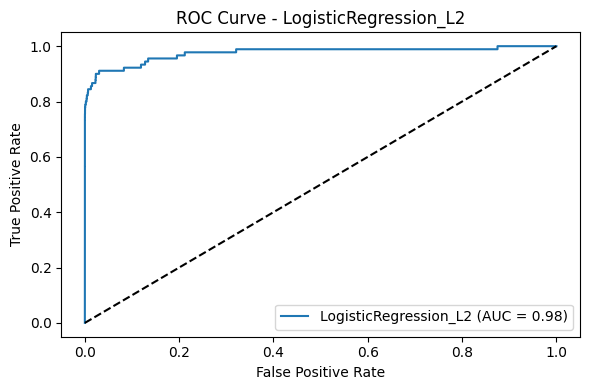

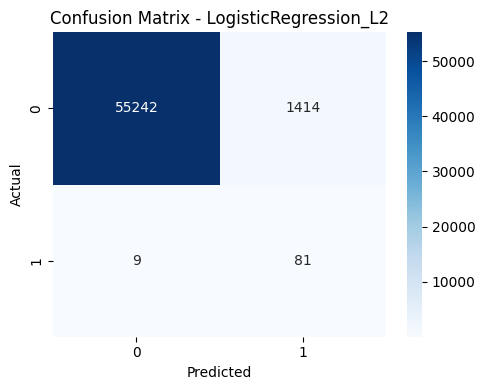

✅ LogisticRegression_L2 complete | Train Acc: 94.65%, Test Acc: 97.49%, ROC-AUC: 97.53% | ✅ No overfitting
🏃 View run LogisticRegression_L2 at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/31bc3a4a27cb4df9aa1e4eab61fafd13
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training LogisticRegression_L1 ...


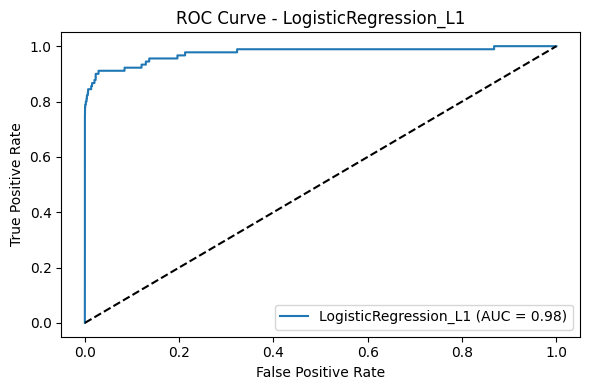

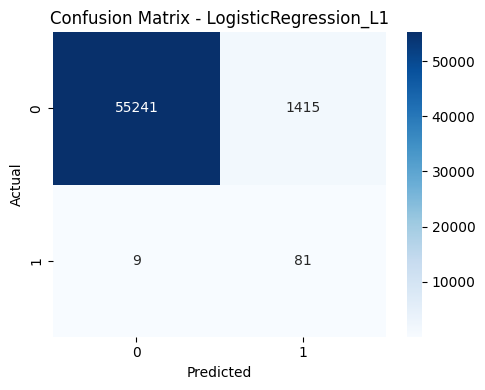

✅ LogisticRegression_L1 complete | Train Acc: 94.64%, Test Acc: 97.49%, ROC-AUC: 97.53% | ✅ No overfitting
🏃 View run LogisticRegression_L1 at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/6a6636b4d214411e933ccde89eab94f9
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training LinearSVC ...


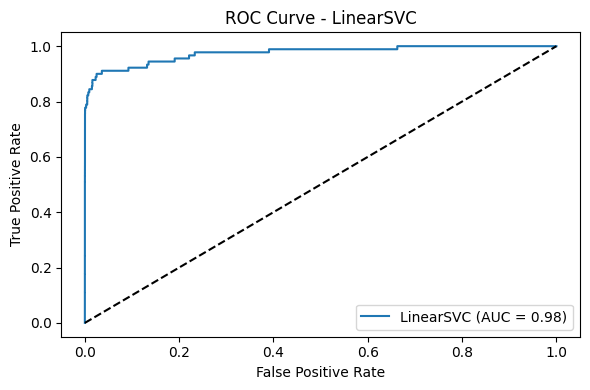

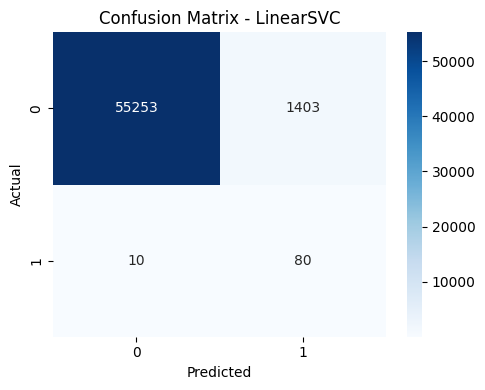

✅ LinearSVC complete | Train Acc: 94.57%, Test Acc: 97.51%, ROC-AUC: 97.52% | ✅ No overfitting
🏃 View run LinearSVC at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/ca146b521ff5495dab06801bbcd70204
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training DecisionTree ...


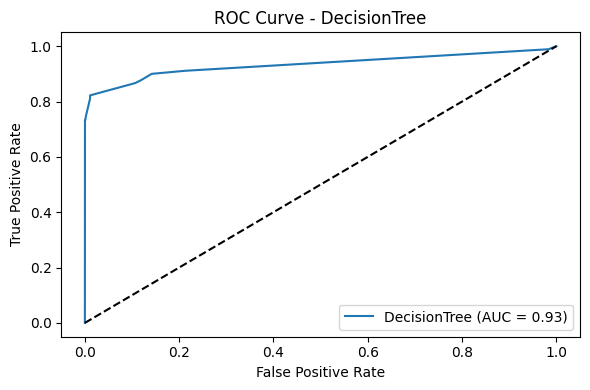

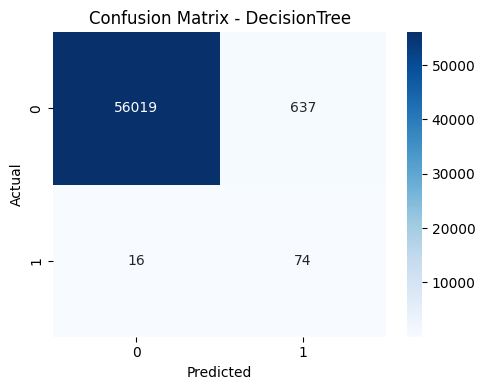

✅ DecisionTree complete | Train Acc: 93.72%, Test Acc: 98.85%, ROC-AUC: 93.30% | ✅ No overfitting
🏃 View run DecisionTree at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/c4b5139074f04743bf22d96a7a7abf88
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training RandomForest ...


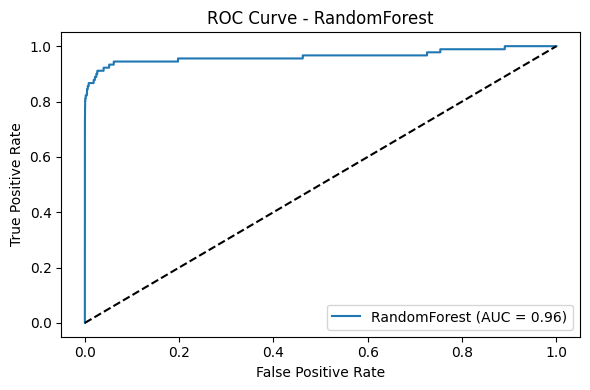

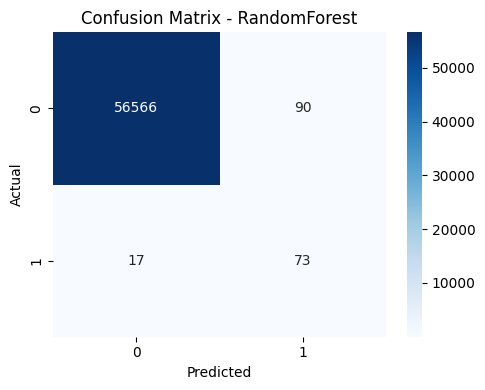

✅ RandomForest complete | Train Acc: 99.20%, Test Acc: 99.81%, ROC-AUC: 96.33% | ✅ No overfitting
🏃 View run RandomForest at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/507db475b6b848fcbe507487f998ee91
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training AdaBoost ...


g:\DataScienceProjects\Machine-Learning-Projects\Credit-Card-Fraud-Detection-MachineLearning-Complete-Project\credit-card-ml-01\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


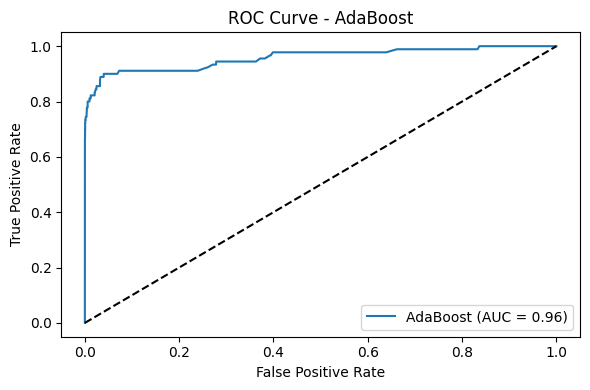

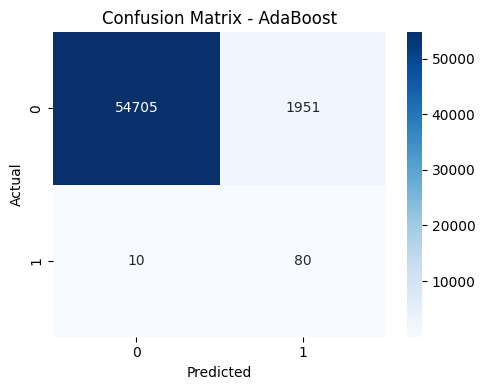

✅ AdaBoost complete | Train Acc: 93.87%, Test Acc: 96.54%, ROC-AUC: 95.83% | ✅ No overfitting
🏃 View run AdaBoost at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/f16ded08c5114b11b1faf3919c950c57
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training GradientBoosting ...


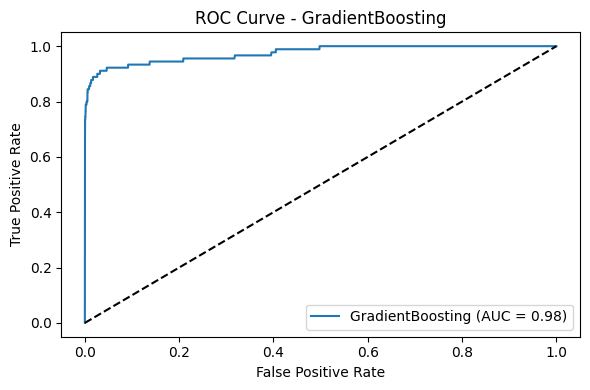

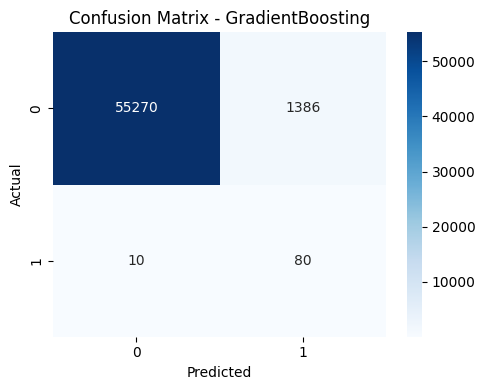

✅ GradientBoosting complete | Train Acc: 94.99%, Test Acc: 97.54%, ROC-AUC: 97.50% | ✅ No overfitting
🏃 View run GradientBoosting at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/c1c7902b37334da0a0976f49422fd807
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training CatBoost ...


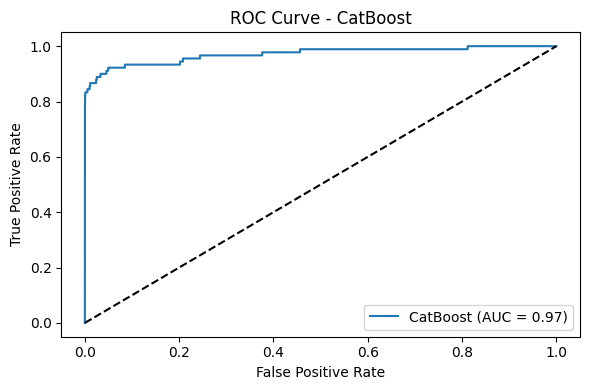

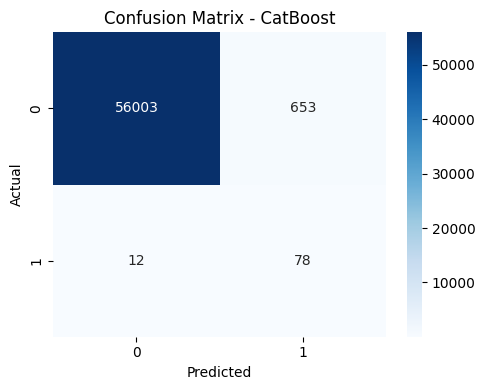

✅ CatBoost complete | Train Acc: 98.79%, Test Acc: 98.83%, ROC-AUC: 97.12% | ✅ No overfitting
🏃 View run CatBoost at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/da00e0307c15471cba386f0be70fc6f5
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training LightGBM ...


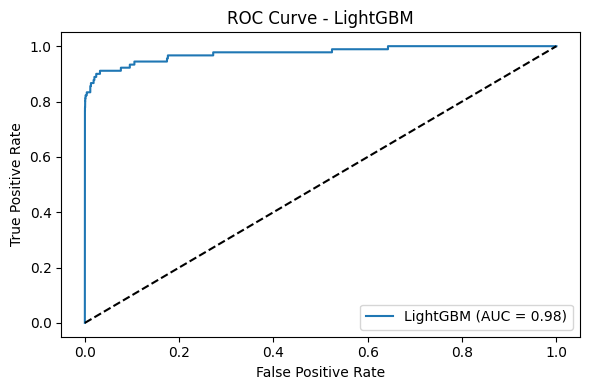

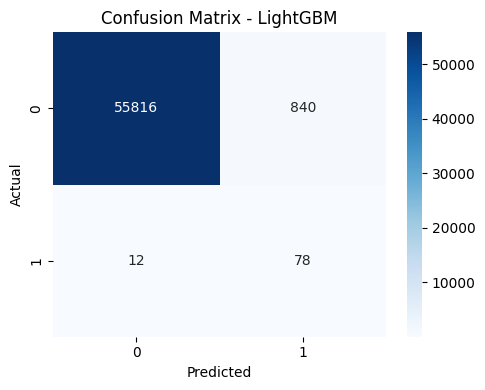

✅ LightGBM complete | Train Acc: 97.56%, Test Acc: 98.50%, ROC-AUC: 97.55% | ✅ No overfitting
🏃 View run LightGBM at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/3f8fe64625a94be7af7ac3edca9069b3
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0

🚀 Training XGBoost ...


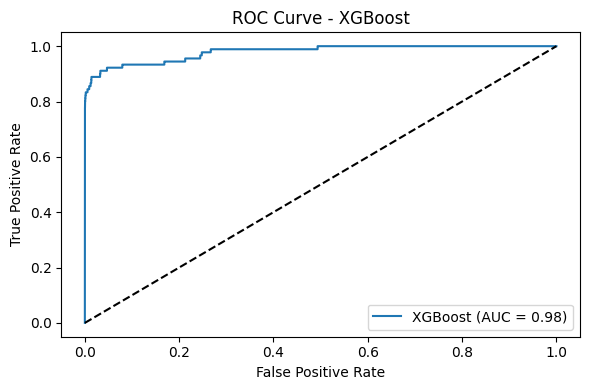

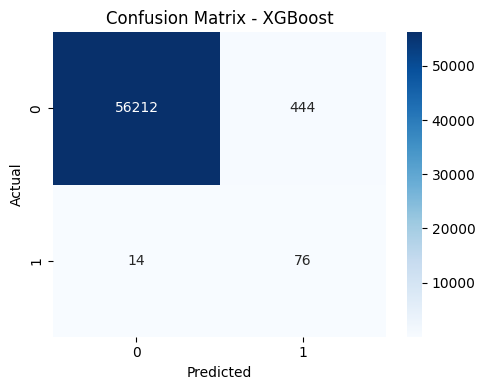

✅ XGBoost complete | Train Acc: 99.30%, Test Acc: 99.19%, ROC-AUC: 97.90% | ✅ No overfitting
🏃 View run XGBoost at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0/runs/3c46af349b7e4553b52beb5b58021bca
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Credit-Card-Fraud-Detection-MachineLearning-Complete-Project.mlflow/#/experiments/0


In [28]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# import mlflow
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, roc_curve, auc

# results = []

# for name, model in models.items():
#     print(f"\n🚀 Training {name} ...")
    
#     with mlflow.start_run(run_name=name):
#         # Train
#         model.fit(X_train_res, y_train_res)
#         preds = model.predict(X_test)
#         probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

#         # Metrics
#         acc = accuracy_score(y_test, preds)
#         prec = precision_score(y_test, preds)
#         rec = recall_score(y_test, preds)
#         f1 = f1_score(y_test, preds)
#         roc_auc = roc_auc_score(y_test, probs) if probs is not None else roc_auc_score(y_test, preds)

#         # Log params and metrics
#         mlflow.log_params(model.get_params())
#         mlflow.log_metrics({
#             "accuracy": acc,
#             "precision": prec,
#             "recall": rec,
#             "f1_score": f1,
#             "roc_auc": roc_auc
#         })

#         # Store results
#         results.append({
#             "Model": name,
#             "Accuracy": acc,
#             "Precision": prec,
#             "Recall": rec,
#             "F1": f1,
#             "ROC_AUC": roc_auc,
#             "Object": model  # store model object for later
#         })

#         # Optional: ROC Curve
#         if probs is not None:
#             fpr, tpr, _ = roc_curve(y_test, probs)
#             plt.figure()
#             plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
#             plt.plot([0,1],[0,1],'k--')
#             plt.xlabel("False Positive Rate")
#             plt.ylabel("True Positive Rate")
#             plt.title(f"ROC Curve - {name}")
#             plt.legend(loc="lower right")
#             mlflow.log_figure(plt.gcf(), f"{name}_roc_curve.png")
#             plt.show()
#             plt.close()

#         # Optional: Confusion Matrix
#         cm = confusion_matrix(y_test, preds)
#         fig, ax = plt.subplots(figsize=(5,4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
#         plt.title(f"Confusion Matrix - {name}")
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         mlflow.log_figure(fig, f"{name}_confusion_matrix.png")
#         plt.show()
#         plt.close()

#         print(f"✅ {name} complete | ROC-AUC: {roc_auc:.4f}")

# Ensure images/training-images folder exists
# images_dir = "images/training-images"
# os.makedirs(images_dir, exist_ok=True)

# results = []

# for name, model in models.items():
#     print(f"\n🚀 Training {name} ...")
    
#     with mlflow.start_run(run_name=name):
#         # Train model
#         model.fit(X_train_res, y_train_res)
        
#         # Predictions
#         preds = model.predict(X_test)
#         train_preds = model.predict(X_train_res)
#         if hasattr(model, "predict_proba"):
#             probs = model.predict_proba(X_test)[:, 1]
#             train_probs = model.predict_proba(X_train_res)[:, 1]
#         else:
#             probs = None
#             train_probs = None

#         # Metrics
#         acc = accuracy_score(y_test, preds)
#         train_acc = accuracy_score(y_train_res, train_preds)
#         roc_auc = roc_auc_score(y_test, probs) if probs is not None else roc_auc_score(y_test, preds)
#         train_roc_auc = roc_auc_score(y_train_res, train_probs) if train_probs is not None else roc_auc_score(y_train_res, train_preds)

#         # Log params and metrics
#         mlflow.log_params(model.get_params())
#         mlflow.log_metrics({
#             "train_accuracy": train_acc,
#             "train_roc_auc": train_roc_auc,
#             "test_accuracy": acc,
#             "roc_auc": roc_auc
#         })

#         # Store results
#         results.append({
#             "Model": name,
#             "Train_Accuracy": train_acc,
#             "Train_ROC_AUC": train_roc_auc,
#             "Test_Accuracy": acc,
#             "ROC_AUC": roc_auc,
#             "Object": model
#         })

#         # Save ROC Curve
#         if probs is not None:
#             fpr, tpr, _ = roc_curve(y_test, probs)
#             plt.figure(figsize=(6,4))
#             plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
#             plt.plot([0,1],[0,1],'k--')
#             plt.xlabel("False Positive Rate")
#             plt.ylabel("True Positive Rate")
#             plt.title(f"ROC Curve - {name}")
#             plt.legend(loc="lower right")
#             plt.tight_layout()
#             plt.savefig(os.path.join(images_dir, f"{name}_roc_curve.png"))
#             plt.show()
#             plt.close()

#         # Save Confusion Matrix
#         cm = confusion_matrix(y_test, preds)
#         fig, ax = plt.subplots(figsize=(5,4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
#         plt.title(f"Confusion Matrix - {name}")
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.tight_layout()
#         plt.savefig(os.path.join(images_dir, f"{name}_confusion_matrix.png"))
#         plt.show()
#         plt.close()

#         print(f"✅ {name} complete | Train Acc: {train_acc:.4f}, Test Acc: {acc:.4f}, ROC-AUC: {roc_auc:.4f}")


# import os
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
# import matplotlib.pyplot as plt
# import seaborn as sns
# import mlflow

# # Ensure images/training-images folder exists
# images_dir = "images/training-images"
# os.makedirs(images_dir, exist_ok=True)

# results = []

# for name, model in models.items():
#     print(f"\n🚀 Training {name} ...")
    
#     with mlflow.start_run(run_name=name):
#         # Train model
#         model.fit(X_train_res, y_train_res)
        
#         # Predictions
#         preds = model.predict(X_test)
#         train_preds = model.predict(X_train_res)
        
#         if hasattr(model, "predict_proba"):
#             probs = model.predict_proba(X_test)[:, 1]
#             train_probs = model.predict_proba(X_train_res)[:, 1]
#         else:
#             probs = None
#             train_probs = None

#         # Metrics
#         train_acc = accuracy_score(y_train_res, train_preds)
#         test_acc = accuracy_score(y_test, preds)
#         train_roc_auc = roc_auc_score(y_train_res, train_probs) if train_probs is not None else roc_auc_score(y_train_res, train_preds)
#         test_roc_auc = roc_auc_score(y_test, probs) if probs is not None else roc_auc_score(y_test, preds)

#         # Overfitting detection (train-test gap > 5%)
#         overfit_flag = (train_acc - test_acc > 0.05) or (train_roc_auc - test_roc_auc > 0.05)
#         overfit_status = "⚠️ Overfitting" if overfit_flag else "✅ No overfitting"

#         # Log params and metrics
#         mlflow.log_params(model.get_params())
#         mlflow.log_metrics({
#             "train_accuracy": train_acc,
#             "train_roc_auc": train_roc_auc,
#             "test_accuracy": test_acc,
#             "test_roc_auc": test_roc_auc
#         })

#         # Store results
#         results.append({
#             "Model": name,
#             "Train_Accuracy": train_acc,
#             "Train_ROC_AUC": train_roc_auc,
#             "Test_Accuracy": test_acc,
#             "Test_ROC_AUC": test_roc_auc,
#             "Overfitting": overfit_status,
#             "Object": model
#         })

#         # Save ROC Curve
#         if probs is not None:
#             fpr, tpr, _ = roc_curve(y_test, probs)
#             plt.figure(figsize=(6,4))
#             plt.plot(fpr, tpr, label=f'{name} (AUC = {test_roc_auc:.2f})')
#             plt.plot([0,1],[0,1],'k--')
#             plt.xlabel("False Positive Rate")
#             plt.ylabel("True Positive Rate")
#             plt.title(f"ROC Curve - {name}")
#             plt.legend(loc="lower right")
#             plt.tight_layout()
#             plt.savefig(os.path.join(images_dir, f"{name}_roc_curve.png"))
#             plt.show()
#             plt.close()

#         # Save Confusion Matrix
#         cm = confusion_matrix(y_test, preds)
#         fig, ax = plt.subplots(figsize=(5,4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
#         plt.title(f"Confusion Matrix - {name}")
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.tight_layout()
#         plt.savefig(os.path.join(images_dir, f"{name}_confusion_matrix.png"))
#         plt.show()
#         plt.close()

#         print(f"✅ {name} complete | Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, ROC-AUC: {test_roc_auc:.4f} | {overfit_status}")


import os
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

# Ensure images/training-images folder exists
images_dir = "images/training-images"
os.makedirs(images_dir, exist_ok=True)

results = []

for name, model in models.items():
    print(f"\n🚀 Training {name} ...")
    
    with mlflow.start_run(run_name=name):
        # Train model
        model.fit(X_train_res, y_train_res)
        
        # Predictions
        preds = model.predict(X_test)
        train_preds = model.predict(X_train_res)
        
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test)[:, 1]
            train_probs = model.predict_proba(X_train_res)[:, 1]
        else:
            probs = None
            train_probs = None

        # Metrics
        train_acc = accuracy_score(y_train_res, train_preds)
        test_acc = accuracy_score(y_test, preds)
        train_roc_auc = roc_auc_score(y_train_res, train_probs) if train_probs is not None else roc_auc_score(y_train_res, train_preds)
        test_roc_auc = roc_auc_score(y_test, probs) if probs is not None else roc_auc_score(y_test, preds)

        # Overfitting detection (train-test gap > 5%)
        overfit_flag = (train_acc - test_acc > 0.05) or (train_roc_auc - test_roc_auc > 0.05)
        overfit_status = "⚠️ Overfitting" if overfit_flag else "✅ No overfitting"

        # Log params and metrics
        mlflow.log_params(model.get_params())
        mlflow.log_metrics({
            "train_accuracy": train_acc,
            "train_roc_auc": train_roc_auc,
            "test_accuracy": test_acc,
            "test_roc_auc": test_roc_auc
        })

        # Store results
        results.append({
            "Model": name,
            "Train_Accuracy": train_acc,
            "Train_ROC_AUC": train_roc_auc,
            "Test_Accuracy": test_acc,
            "Test_ROC_AUC": test_roc_auc,
            "Overfitting": overfit_status,
            "Object": model
        })

        # Save ROC Curve
        if probs is not None:
            fpr, tpr, _ = roc_curve(y_test, probs)
            plt.figure(figsize=(6,4))
            plt.plot(fpr, tpr, label=f'{name} (AUC = {test_roc_auc:.2f})')
            plt.plot([0,1],[0,1],'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {name}")
            plt.legend(loc="lower right")
            plt.tight_layout()
            plt.savefig(os.path.join(images_dir, f"{name}_roc_curve.png"))
            plt.show()
            plt.close()

        # Save Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        fig, ax = plt.subplots(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig(os.path.join(images_dir, f"{name}_confusion_matrix.png"))
        plt.show()
        plt.close()

        # print(f"✅ {name} complete | Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, ROC-AUC: {test_roc_auc:.4f} | {overfit_status}")
        print(f"✅ {name} complete | Train Acc: {train_acc*100:.2f}%, Test Acc: {test_acc*100:.2f}%, ROC-AUC: {test_roc_auc*100:.2f}% | {overfit_status}")

        # Stop the loop if overfitting is detected
        if overfit_flag:
            print(f"\n⚠️ Overfitting detected for {name}. Stopping further training to prevent wasted computation.")
            break



In [29]:
# # Convert results to DataFrame for easy inspection
# import pandas as pd
# results_df = pd.DataFrame(results)
# print("\nAll Models Results:\n")
# print(results_df[['Model','Train_Accuracy','Test_Accuracy','ROC_AUC']])

# # Convert results to DataFrame for easy inspection
# import pandas as pd

# results_df = pd.DataFrame(results)

# print("\nAll Models Results:\n")
# print(results_df[['Model', 'Train_Accuracy', 'Test_Accuracy', 'Test_ROC_AUC', 'Overfitting']])

In [30]:
# 1️⃣ Find best model based on Test ROC-AUC
best_model = max(results, key=lambda x: x['Test_ROC_AUC'])['Object']
best_model_name = max(results, key=lambda x: x['Test_ROC_AUC'])['Model']

print(f"🏆 Best model: {best_model_name}")

# 2️⃣ Predict on a single sample (first row of X_test)
sample = X_test.iloc[0:1]  # keep it 2D
pred_class = best_model.predict(sample)[0]

# Optional: probability if supported
if hasattr(best_model, "predict_proba"):
    pred_prob = best_model.predict_proba(sample)[0][1]
    print(f"Predicted class: {pred_class}, Probability of class 1: {pred_prob*100:.2f}%")
else:
    print(f"Predicted class: {pred_class}")


🏆 Best model: XGBoost
Predicted class: 0, Probability of class 1: 5.53%


In [31]:
import os
import joblib

# Ensure the folder exists
os.makedirs("models", exist_ok=True)

# Save the best model
joblib.dump(best_model, "models/best_model.pkl")

# Load it later (optional)
loaded_model = joblib.load("models/best_model.pkl")

# Predict on a single sample
sample_pred = loaded_model.predict(sample)              # predicted class
sample_prob = loaded_model.predict_proba(sample)[:, 1]  # probability of class 1

print(f"Predicted class: {sample_pred[0]}")
print(f"Probability of class 1: {sample_prob[0]*100:.2f}%")


Predicted class: 0
Probability of class 1: 5.53%
